In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions1vs0_time_cross.tsv', sep="\t")
print(df)

   project_ids  sample_ids genders  doses  target  prediction  \
0    SRP161461  SRR7817611    male      0       0           0   
1    SRP161461  SRR7817612    male      0       0           0   
2    SRP161461  SRR7817614    male      0       0           0   
3    SRP161461  SRR7817615    male      0       0           0   
4    SRP161461  SRR7817616    male      0       0           0   
..         ...         ...     ...    ...     ...         ...   
89   SRP090688  SRR4317610    male      0       0           1   
90   SRP090688  SRR4317611    male      0       0           0   
91   SRP090688  SRR4317612    male      0       0           0   
92   SRP090688  SRR4317639    male      1       1           1   
93   SRP090688  SRR4317640    male      1       1           1   

    confidence_class_0  confidence_class_1  
0             0.999723            0.000277  
1             0.997009            0.002991  
2             0.999799            0.000201  
3             0.999701            0.000

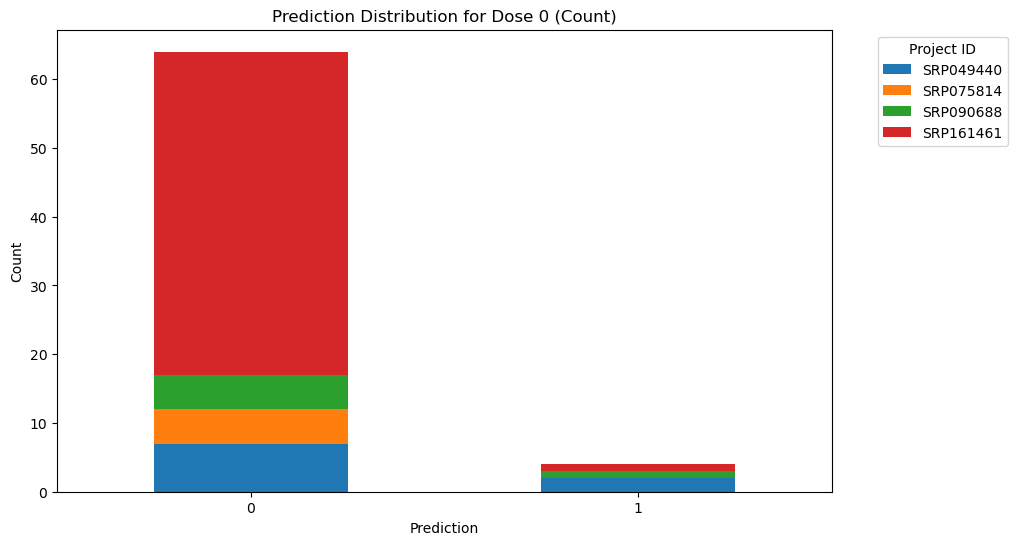

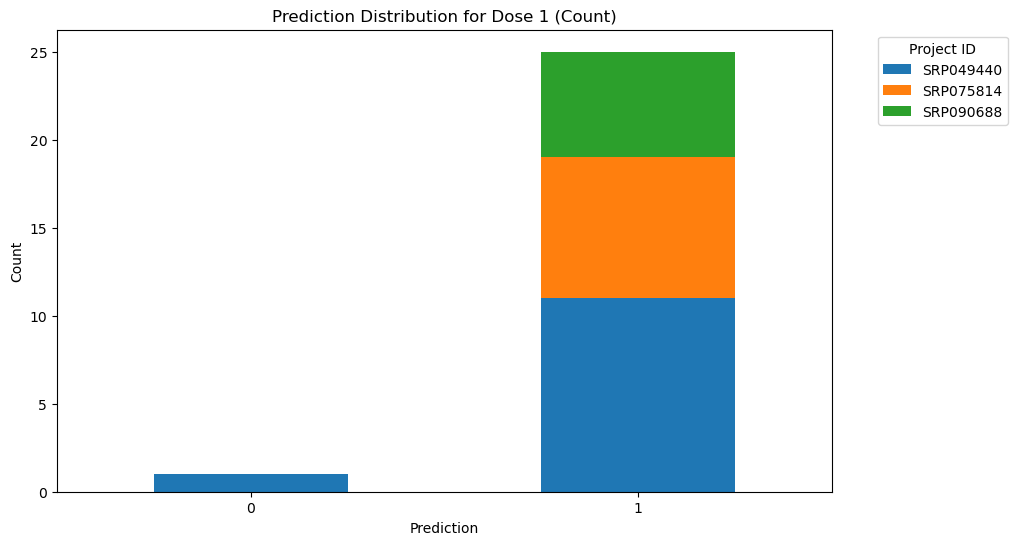

In [ ]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_01vs0_time_cross.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_11vs0_time_cross.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.009768  0.010279  R-MMU-9613507  R-MMU-9613545
1     0.008223  0.008677  R-MMU-9613545  R-MMU-9613562
2     0.005640  0.005555  R-MMU-9613562  R-MMU-9613670
3     0.004495  0.002509  R-MMU-9639715  R-MMU-9640117
4     0.024705  0.018498  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.006733  0.000016  R-MMU-8856808  R-MMU-8856813
8552  0.022263  0.016885  R-MMU-8868651  R-MMU-8868648
8553  0.001628  0.002496  R-MMU-8868648  R-MMU-8868661
8554  0.057720  0.051140  R-MMU-8868660  R-MMU-8868658
8555  0.008873  0.008758  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig0_1vs0_time_cross.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1_1vs0_time_cross.csv', sep='\t',index=False)

